#Objective
1. Perform Univaraite analysis(PDF, CDF, Boxplot, Voilin plots) to understand which features are useful towards classification.
2. Perform Bi-variate analysis (scatter plots, pair-plots) to see if combinations of features are useful in classfication.
3. Write  observations in english as crisply and unambigously as possible and qaunitfy results

In [1]:
import warnings 

warnings.filterwarnings("ignore") 

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [44]:
haberman = pd.read_csv("data/haberman.csv",names=['age','year_of_surgery','active_lymph_nodes','survival_status_after_5_year'])
haberman.head(5)

,age,year_of_surgery,active_lymph_nodes,survival_status_after_5_year
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [34]:
print(haberman.shape)

(306, 4)


In [35]:
haberman.columns

Index(['age', 'year_of_surgery', 'active_lymph_nodes',
       'survival_status_after_5_year'],
      dtype='object')

In [36]:
#print number of instances for each label
haberman.survival_status_after_5_year.value_counts()

1    225
2     81
Name: survival_status_after_5_year, dtype: int64

In [37]:
haberman.describe()

,age,year_of_surgery,active_lymph_nodes,survival_status_after_5_year
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [38]:
haberman.age.median()

52.0

Observation:


*   The median age of patients in 52
*   About 25% of patients have age between 60 and 83
*   Although max lymph nodes in recorded as 52, 75% of people have less than 4 lymph nodes
*   We observe an imbalance in the count of labels





# Univariate analysis


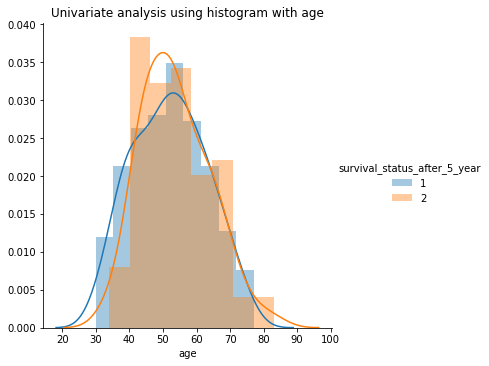

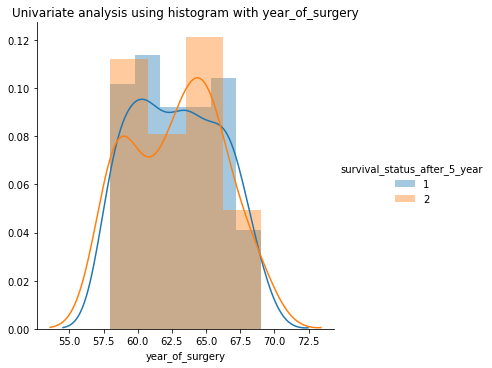

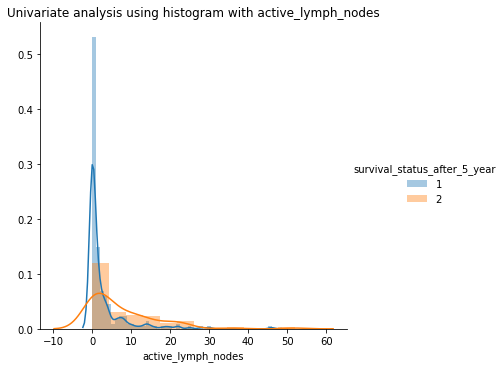

In [39]:
for feature in list(haberman.columns)[:-1]:
  sns.FacetGrid(haberman, hue="survival_status_after_5_year", size=5,) \
    .map(sns.distplot, feature) \
    .add_legend()
  plt.title("Univariate analysis using histogram with {}".format(feature))
  plt.show();

......... age .........
[0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
[30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]
......... year_of_surgery .........
[0.20588235 0.09150327 0.08496732 0.0751634  0.09803922 0.10130719
 0.09150327 0.09150327 0.08169935 0.07843137]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
......... active_lymph_nodes .........
[0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


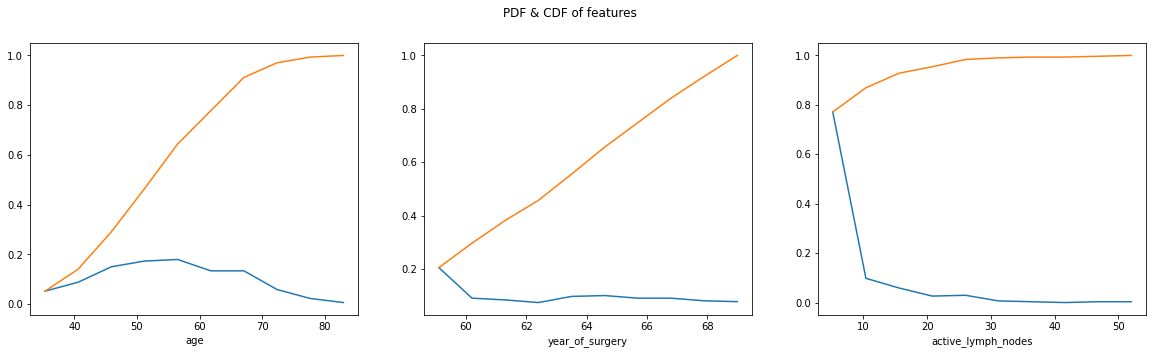

In [ ]:
survival_rate_true = haberman.loc[haberman["survival_status_after_5_year"] == 1]
survival_rate_false = haberman.loc[haberman["survival_status_after_5_year"] == 1]

plt.figure(figsize=(20,5))
for idx, feature in enumerate(list(haberman.columns)[:-1]):
  plt.subplot(1, 3, idx+1)
  plt.suptitle("PDF & CDF of features")
  counts, bin_edges = np.histogram(haberman[feature], bins=10, 
                                 density = True)
  pdf = counts/(sum(counts))
  print("......... "+feature+" .........")
  print(pdf)
  print(bin_edges)
  cdf = np.cumsum(pdf)

  plt.plot(bin_edges[1:],pdf,bin_edges[1:], cdf)
  plt.xlabel(feature)

**For age**

About 10% of people have age >90

**For year_of_surgery**

30% of surgeries happend before 1930

**For active lymph nodes**

We can see that nearly 80% of patients have lymph nodes around 5





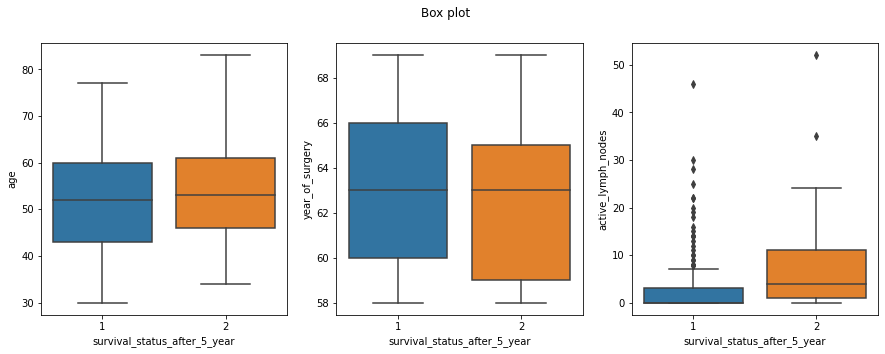

In [40]:
plt.figure(figsize=(15,5))
for index, feature in enumerate(list(haberman.columns)[:-1]):
  plt.suptitle("Box plot")
  plt.subplot(1,3,index+1)
  sns.boxplot(x=haberman.survival_status_after_5_year,y=feature, data=haberman)

### Age
1. for survival rate of 1: 50% patients lie between 44 and 60 years
2. for survival rate of 2: 50% patients lie between 46 and 62 years

==> younger people have better chance of survival
### Year of surgery
1. for survival rate of 1: 50% patients had surgery b/w 1960 and 1966
2. for survival rate of 2: 75% patients had surgery b/w 1959 and 1963

==> more people were dying in early years of surgery
### Active lymph nodes
==> clearly evident that 25% of patients who had 0 survival rate after 5 years had more than 5 active lymph nodes 




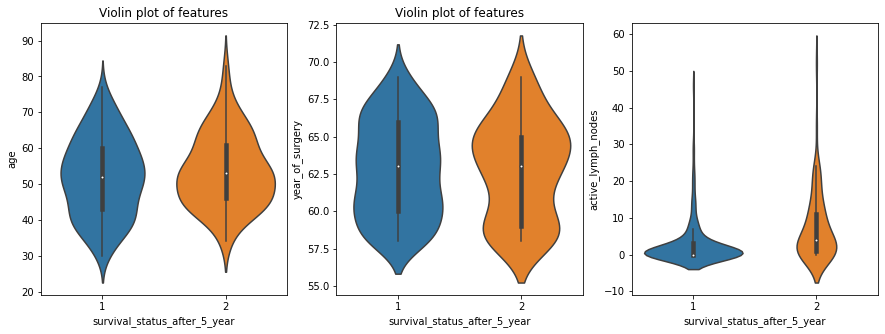

In [41]:
plt.figure(figsize=(15,5))
for index, feature in enumerate(list(haberman.columns)[:-1]):
  plt.title("Violin plot of features")
  plt.subplot(1,3,index+1)
  sns.violinplot(x=haberman.survival_status_after_5_year,y=feature, data=haberman)

The patients treated after 1966 have the slighlty higher chance to surive that the rest. The patients treated before 1959 have the slighlty lower chance to surive that the rest. 

# Bivariate Analysis

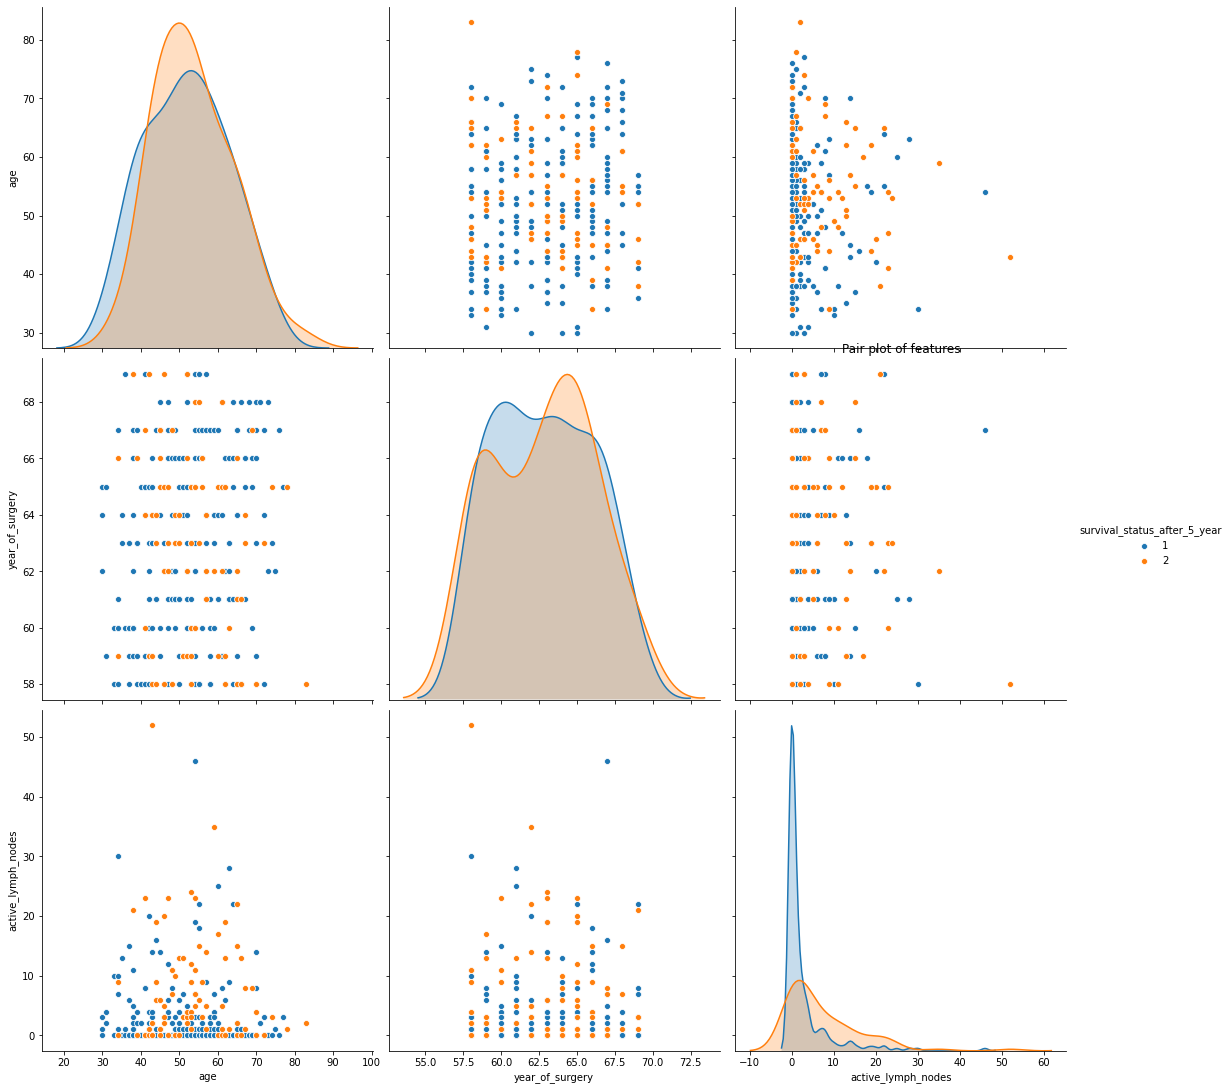

In [42]:
sns.pairplot(haberman, hue='survival_status_after_5_year', size=5)
plt.title("Pair plot of features")
plt.show()

Though we have overlapping label points in all the pair plots, the best distiction could be seen in year of surgery and active lymph nodes.